<a href="https://colab.research.google.com/github/eliasdengo/API-USING-Nodejs/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importing the dependence
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data collection and processing

In [7]:
#data loading to pandas
loan_data=pd.read_csv('/content/sample_data/loan_data.csv')

In [8]:
type(loan_data)

pandas.core.frame.DataFrame

In [9]:
#get top 5 sample data
loan_data.head()


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [10]:
#row and column of data set
loan_data.shape

(381, 14)

In [32]:
#statistics of loan data
loan_data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,369.000000,363.000000,373.000000,370.000000,351.000000
mean,190.000000,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,110.129469,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [11]:
#number of missing value in column
loan_data.isnull().sum()

,0
Unnamed: 0,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,6
Self_Employed,21
ApplicantIncome,12
CoapplicantIncome,18
LoanAmount,8


In [12]:
#droping missing value
loan_data=loan_data.dropna()

In [13]:
#check missing value
loan_data.isnull().sum()

,0
Unnamed: 0,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0


In [14]:
#label encoding
loan_data.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

/tmp/ipython-input-14-842043268.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)


In [15]:
# loan data head which is top 5
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,1


In [16]:
#number of row and column
loan_data.shape

(272, 14)

In [17]:
#loan data dependent
loan_data['Dependents'].value_counts()

,count
Dependents,
0,173
2,41
1,38
3+,20


In [18]:
#replace the value of 3+ to 4
loan_data=loan_data.replace(to_replace='3+',value=4)

In [19]:
#loan data Dependents
loan_data['Dependents'].value_counts()

,count
Dependents,
0,173
2,41
1,38
4,20


Data Visualization

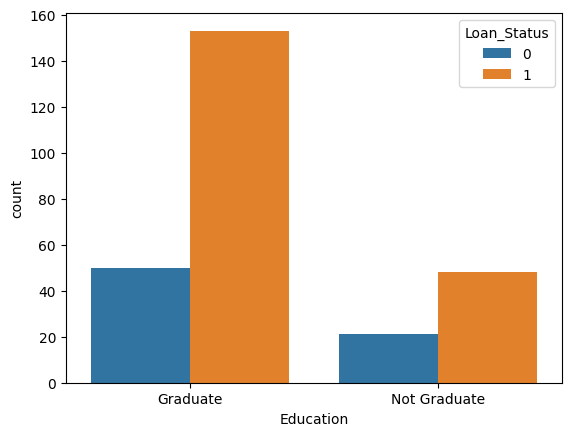

In [20]:
#Education and Loan status
sns.countplot(x="Education", hue="Loan_Status", data=loan_data)
plt.show()

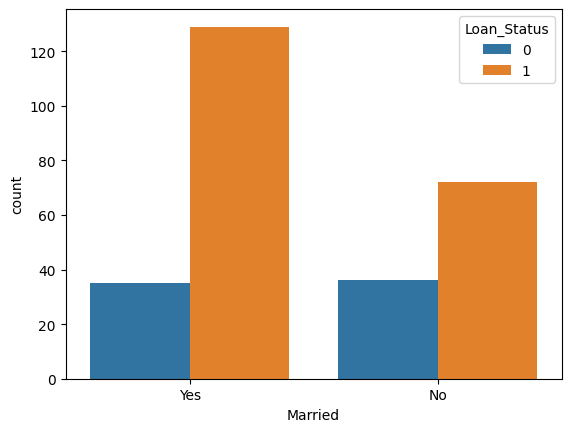

In [21]:
#Married status	 and Loan status
sns.countplot(x="Married", hue="Loan_Status", data=loan_data)
plt.show()

In [22]:
#converting to numerical value
loan_data.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},"Education":{"Graduate":1,"Not Graduate":0},"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2}},inplace=True)

/tmp/ipython-input-22-2527210290.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},"Education":{"Graduate":1,"Not Graduate":0},"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2}},inplace=True)


In [23]:
# top 5
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,1,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,2,LP001006,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,3,LP001008,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,4,LP001013,1,1,0,0,0,2333.0,1516.0,95.0,360.0,1.0,2,1


In [26]:
#separating data and label
x=loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan_data['Loan_Status']

In [27]:
print(x)
print(y)

     Unnamed: 0  Gender  Married Dependents  Education  Self_Employed  \
0             0       1        1          1          1              0   
1             1       1        1          0          1              1   
2             2       1        1          0          0              0   
3             3       1        0          0          1              0   
4             4       1        1          0          0              0   
..          ...     ...      ...        ...        ...            ...   
373         373       1        1          0          1              0   
374         374       1        0          0          0              0   
376         376       1        1          4          1              0   
378         378       0        0          0          1              0   
379         379       1        1          4          1              0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583.0             1508.0       128.